In [62]:
# Import Numpy & PyTorch
import numpy as np
import torch
import pandas as pd
from sklearn.model_selection import train_test_split

A tensor is a number, vector, matrix or any n-dimensional array.

## Problem Statement

We'll create a model that predicts crop yeilds for apples (*target variable*) by looking at the average temperature, rainfall and humidity (*input variables or features*) in different regions. 

Here's the training data:

>Temp | Rain | Humidity | Prediction
>--- | --- | --- | ---
> 73 | 67 | 43 | 56
> 91 | 88 | 64 | 81
> 87 | 134 | 58 | 119
> 102 | 43 | 37 | 22
> 69 | 96 | 70 | 103

In a **linear regression** model, each target variable is estimated to be a weighted sum of the input variables, offset by some constant, known as a bias :

```
yeild_apple  = w11 * temp + w12 * rainfall + w13 * humidity + b1
```

It means that the yield of apples is a linear or planar function of the temperature, rainfall & humidity.



**Our objective**: Find a suitable set of *weights* and *biases* using the training data, to make accurate predictions.

## Training Data
The training data can be represented using 2 matrices (inputs and targets), each with one row per observation and one column for variable.

In [26]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [27]:
# Target (apples)
targets = np.array([[56], 
                    [81], 
                    [119], 
                    [22], 
                    [103]], dtype='float32')

## Linear Regression Model (from scratch)

The *weights* and *biases* can also be represented as matrices, initialized with random values. The first row of `w` and the first element of `b` are use to predict the first target variable i.e. yield for apples, and similarly the second for oranges.

The *model* is simply a function that performs a matrix multiplication of the input `x` and the weights `w` (transposed) and adds the bias `b` (replicated for each observation).

$$
\hspace{2.5cm} X \hspace{1.1cm} \times \hspace{1.2cm} W^T \hspace{1.2cm}  + \hspace{1cm} b \hspace{2cm}
$$

$$
\left[ \begin{array}{cc}
73 & 67 & 43 \\
91 & 88 & 64 \\
\vdots & \vdots & \vdots \\
69 & 96 & 70
\end{array} \right]
%
\times
%
\left[ \begin{array}{cc}
w_{11} & w_{21} \\
w_{12} & w_{22} \\
w_{13} & w_{23}
\end{array} \right]
%
+
%
\left[ \begin{array}{cc}
b_{1} & b_{2} \\
b_{1} & b_{2} \\
\vdots & \vdots \\
b_{1} & b_{2} \\
\end{array} \right]
$$

In [30]:
mu = np.mean(inputs, 0)
sigma = np.std(inputs, 0)
#normalizing the input
inputs = (inputs-mu) / sigma
inputs = np.hstack((np.ones((targets.size,1)),inputs))
print(inputs.shape)

(5, 4)


In [31]:
# Weights and biases
rg = np.random.default_rng(28)
w = rg.random((1, 4))
print(w)

[[0.85183394 0.88489295 0.76570853 0.0321986 ]]


## Loss Function

We can compare the predictions with the actual targets, using the following method: 
* Calculate the difference between the two matrices (`preds` and `targets`).
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.

The result is a single number, known as the **mean squared error** (MSE).

In [33]:
# MSE loss
def mse_loss(t1, t2):
    diff = t1 - t2
    return np.sum(diff * diff) / diff.size

In [34]:
# Define the model
def model(x,w):
    return x @ w.T

In [41]:
# Compute gradients
def gradient_descent(X, y, w, learning_rate, n_iters):
    J_history = np.zeros((n_iters,1))
    for i in range(n_iters):
        h = model(X,w)
        diff = h - y
        delta = (learning_rate/y.size)*(X.T@diff)
        new_w = w - delta.T
        w=new_w
        J_history[i] = mse_loss(h, y)
    return (J_history, w)

In [36]:
# Compute error
preds = model(inputs,w)
cost_initial = mse_loss(preds, targets)
print("Cost before regression: ",cost_initial)


Cost before regression:  6838.52070955769


## Train for multiple epochs

To reduce the loss further, we repeat the process of adjusting the weights and biases using the gradients multiple times. Each iteration is called an epoch.

In [43]:
# Train for 100 epochs
import matplotlib.pyplot as plt
n_iters = 500
learning_rate = 0.01

initial_cost = mse_loss(model(inputs,w),targets)

print("Initial cost is: ", initial_cost, "\n")

(J_history, optimal_params) = gradient_descent(inputs, targets, w, learning_rate, n_iters)

print("Optimal parameters are: \n", optimal_params, "\n")

print("Final cost is: ", J_history[-1])

Initial cost is:  6838.52070955769 

Optimal parameters are: 
 [[75.70492636 -4.35531158 24.05429275 10.55531256]] 

Final cost is:  [3.06533067]


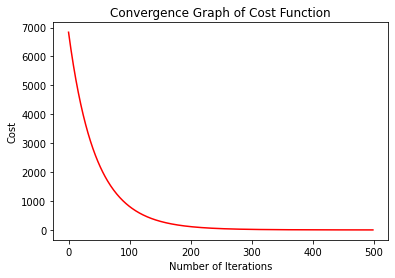

In [45]:
plt.plot(range(len(J_history)), J_history, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [47]:
# Calculate error
preds = model(inputs,optimal_params)
cost_final = mse_loss(preds, targets)

# Print predictions
print("Prediction:\n",preds)

# Comparing predicted with targets
print("Targets:\n",targets)

Prediction:
 [[ 55.4720205 ]
 [ 83.3278966 ]
 [116.11787692]
 [ 20.93457341]
 [102.67226376]]
Targets:
 [[ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]]


In [49]:
print("Cost after linear regression: ",cost_final)
print("Cost reduction percentage : {} %".format(((cost_initial- cost_final)/cost_initial)*100))

Cost after linear regression:  3.0494086420414903
Cost reduction percentage : 99.95540835845127 %
